## Getting and reading the merchant data

In [33]:
import pandas as pd

merchant_df = pd.read_excel('./data/mercado-desafio.xlsx')

## Understanding the data and removing less important columns

In [34]:
merchant_df.shape

(308469, 9)

In [35]:
merchant_df.head()

,Date,Company,Origin_city,Origin_state,Destination_city,Destination_state,Product,Price,CBOT
0,2024-01-30,Polaris,Abelardo Luz,SC,Joaçaba,SC,Soja,114.231354,1260.025702
1,2024-01-30,Polaris,Alegrete,RS,Rio Grande,RS,Soja,118.031576,1241.320557
2,2024-01-30,Polaris,Alta Floresta,MT,Barcarena,PA,Milho,31.075042,501.491344
3,2024-01-30,Polaris,Alta Floresta,MT,Barcarena,PA,Soja,94.684088,1173.122729
4,2024-01-30,Polaris,Alta Floresta,MT,Santos,SP,Milho,23.563284,419.767221


In [36]:
from ydata_profiling import ProfileReport

profile = ProfileReport(merchant_df, title='Merchant Profiling Report', explorative=True)

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [37]:
main_columns = ['Date', 'Product', 'Price', 'CBOT']
merchant_df_filtered = merchant_df[main_columns]
merchant_df_filtered = merchant_df_filtered[merchant_df_filtered['Product'] == 'Soja']
merchant_df_filtered

,Date,Product,Price,CBOT
0,2024-01-30,Soja,114.231354,1260.025702
1,2024-01-30,Soja,118.031576,1241.320557
3,2024-01-30,Soja,94.684088,1173.122729
6,2024-01-30,Soja,86.166796,1225.629625
9,2024-01-30,Soja,96.325996,1111.795293
...,...,...,...,...
308458,2024-06-26,Soja,110.722521,1084.896351
308459,NaT,Soja,114.310769,1088.868705
308463,2024-07-03,Soja,106.441908,1061.903504
308465,2024-07-03,Soja,107.164837,1214.925647


In [38]:
merchant_df_filtered.isnull().sum()

Date       2
Product    0
Price      4
CBOT       1
dtype: int64

In [39]:
merchant_df_filtered.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,197305,2024-06-29 00:53:51.269354496,2024-01-30 00:00:00,2024-04-16 00:00:00,2024-07-09 00:00:00,2024-09-11 00:00:00,2024-11-05 00:00:00,NaN
Price,197303.0,111.280105,26.931882,101.838353,110.612971,120.106268,158.409209,12.832415
CBOT,197306.0,1110.206153,859.591295,1035.963648,1105.951229,1183.085012,1374.06816,100.531161


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Price Distribution')

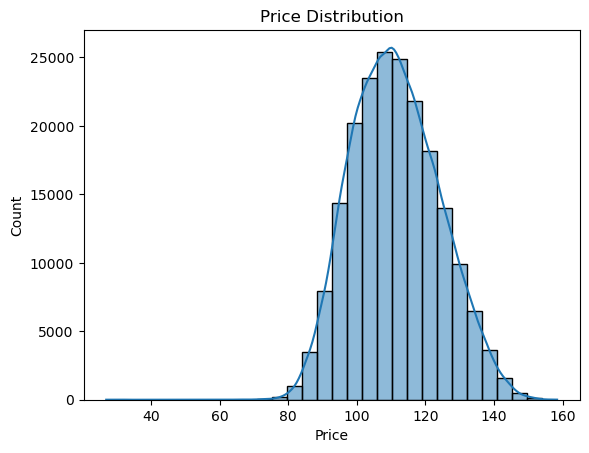

In [41]:
sns.histplot(merchant_df_filtered['Price'], bins=30, kde=True)
plt.title('Price Distribution')

- Here was possible identify outliers in prices under 80 and above 140

Text(0.5, 1.0, 'Price Distribution')

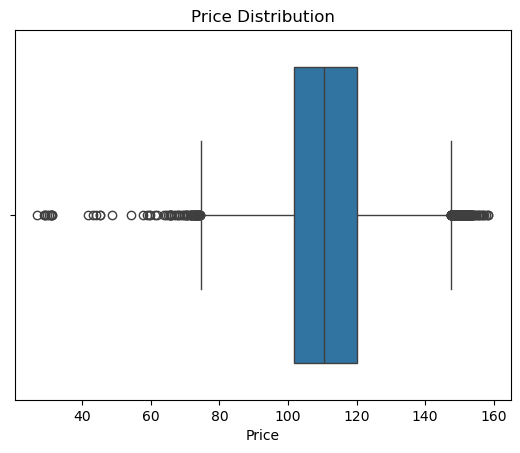

In [42]:
sns.boxplot(data=merchant_df_filtered, x='Price')
plt.title('Price Distribution')

Text(0.5, 1.0, 'CBOT Distribution')

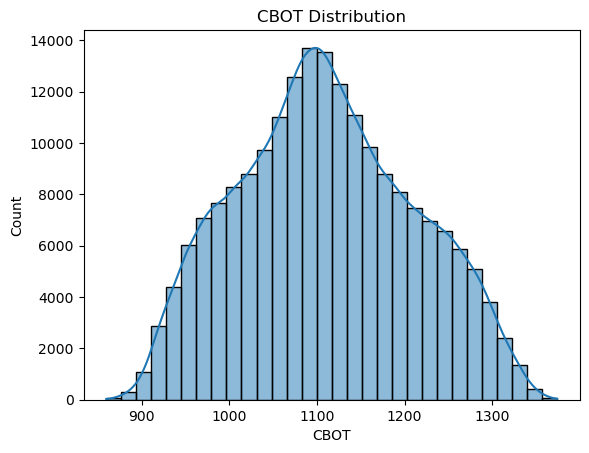

In [43]:
sns.histplot(merchant_df_filtered['CBOT'], bins=30, kde=True)
plt.title('CBOT Distribution')

Text(0.5, 1.0, 'CBOT Distribution')

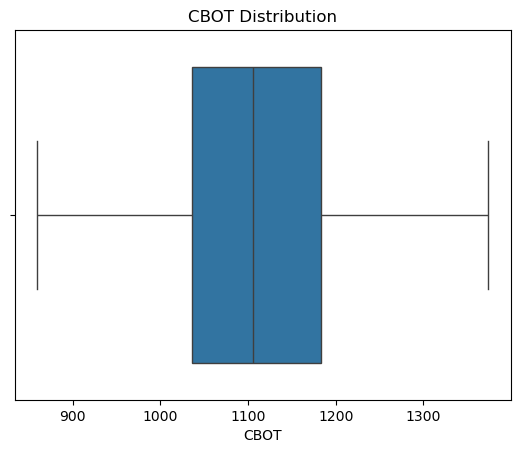

In [44]:
sns.boxplot(data=merchant_df_filtered, x='CBOT')
plt.title('CBOT Distribution')

## Treating outliers and nullable values

In [45]:
merchant_df_filtered['Price'] = merchant_df_filtered['Price'].fillna(merchant_df_filtered['Price'].median())

In [46]:
import numpy as np

- To treat outliers it is necessary to create the functions whiskers, that calculate the lw, uw values

In [47]:
def whisker(col):
    q1,q3=np.percentile(col, [25, 75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

- Code to change all the values below and above the lw and uw values to the lw and uw values

In [48]:
lw,uw=whisker(merchant_df_filtered['Price'])
merchant_df_filtered['Price']=np.where(merchant_df_filtered['Price']<lw,lw,merchant_df_filtered['Price'])
merchant_df_filtered['Price']=np.where(merchant_df_filtered['Price']>uw,uw,merchant_df_filtered['Price'])

- Check if still exists outliers

<Axes: xlabel='Price'>

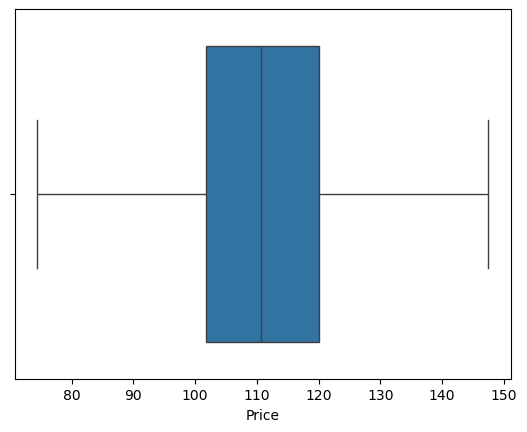

In [49]:
sns.boxplot(data=merchant_df_filtered, x='Price')

In [50]:
merchant_df_filtered.isnull().sum()

Date       2
Product    0
Price      0
CBOT       1
dtype: int64

In [53]:
median_cbot = round(merchant_df_filtered['CBOT'].median(), 6)
merchant_df_filtered.loc[merchant_df_filtered['CBOT'].isnull(), 'CBOT'] = median_cbot
merchant_df_filtered[merchant_df_filtered['CBOT'].isnull()]

,Date,Product,Price,CBOT


In [54]:
merchant_df_filtered["Date"] = merchant_df_filtered["Date"].interpolate(method='linear')
merchant_df_filtered.isnull().sum()

Date       0
Product    0
Price      0
CBOT       0
dtype: int64

In [55]:
merchant_df_filtered.head()

,Date,Product,Price,CBOT
0,2024-01-30,Soja,114.231354,1260.025702
1,2024-01-30,Soja,118.031576,1241.320557
3,2024-01-30,Soja,94.684088,1173.122729
6,2024-01-30,Soja,86.166796,1225.629625
9,2024-01-30,Soja,96.325996,1111.795293
